In [1]:
#Previsão Teórica das distâncias - Modelo ΛCDM

In [2]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at C:\Users\Paula\anaconda3\Lib\site-packages\camb


In [3]:
latede_cosmology = camb.set_params(# Background
                            H0 = 68.17, ombh2=0.02236, omch2=0.118308, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 1,
                            w0 =-1.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [4]:
#Detalhamento Teórico

#Os valores utilizados neste trabalho provém do artigo "DESI DR2 Results II: Measurements of Baryon Acoustic Oscillations and Cosmological Constraints" (https://arxiv.org/pdf/2503.14738)
#TABLE V (pág. 20)

#ombh2: Ω_b * h² densidade de bárions ((valor padrão do Planck))
#h^2: H₀ = 70 → h = 0.70, valor adimensional da constante de Hubble
#omch2: Ω_c * h² densidade de matéria escura fria 
#TCMB: Temperatura do CMB (valor padrão)
#num_nu_massless=3.044: Número efetivo de neutrinos (valor padrão, conforme citado na pág. 5 do artigo)
# As = 2.100549e-09: Amplitude primordial do espectro de potência escalar (valor padrão do Planck)
# ns = 0.9660499: Índice espectral escalar (valor padrão do Planck)
#YHe = 0.246: Fração de Hélio (valor de BBN+Planck)

In [5]:
# Executar o cálculo
results = camb.get_results(latede_cosmology)

# Intervalo de redshift
z_LCDM = np.linspace(0.1, 2.5, 50)

# Distâncias e parâmetros derivados
DA_LCDM = results.angular_diameter_distance(z_LCDM)  # [Mpc]
H_LCDM  = results.hubble_parameter(z_LCDM)            # [km/s/Mpc]
r_s      = results.get_derived_params()['rdrag']        # [Mpc]

# Distâncias normalizadas
DM_LCDM = (1 + z_LCDM) * DA_LCDM / r_s
DH_LCDM = (3e5 / H_LCDM) / r_s
DV_LCDM = ((z_LCDM * (DM_LCDM**2) * DH_LCDM)**(1/3))  # combinação isotrópica

print(f"r_s = {r_s:.2f} Mpc")

r_s = 147.57 Mpc


In [6]:
#[DM_LCDM = (1 + z_LCDM) * DA_LCDM / r_s] e [DH_LCDM = (3e5 / H_LCDM) / r_s]: Essas razões são quantidades adimensionais que permitem comparar observações em diferentes redshifts sem depender do valor absoluto de r_s.

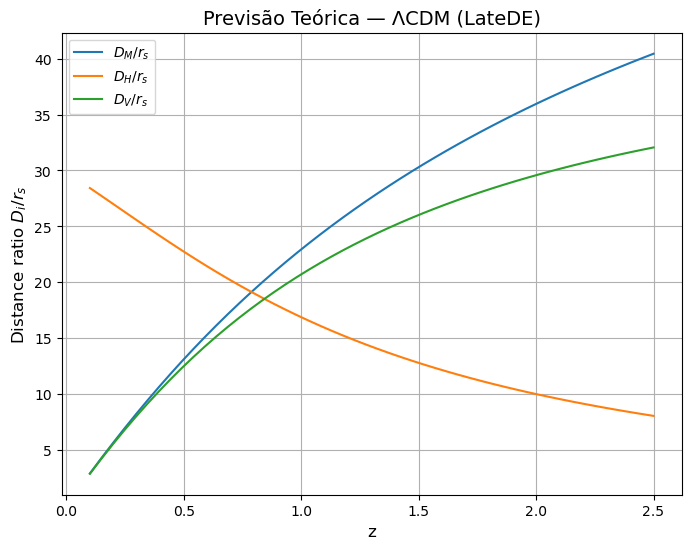

In [7]:
plt.figure(figsize=(8,6))
plt.plot(z_LCDM, DM_LCDM, label=r'$D_M/r_s$', color='tab:blue')
plt.plot(z_LCDM, DH_LCDM, label=r'$D_H/r_s$', color='tab:orange')
plt.plot(z_LCDM, DV_LCDM, label=r'$D_V/r_s$', color='tab:green')

plt.xlabel('z', fontsize=12)
plt.ylabel(r'Distance ratio $D_i / r_s$', fontsize=12)
plt.title('Previsão Teórica — ΛCDM (LateDE)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Previsão Teórica das distâncias - Modelo w_0 w_a

In [9]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at C:\Users\Paula\anaconda3\Lib\site-packages\camb


In [10]:
latede_cosmology = camb.set_params(# Background
                            H0 = 66.74, ombh2=0.022336, omch2=0.119780, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 2,
                            w0 =-0.752, w1 =-0.86, 
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [11]:
# Executar o cálculo
results = camb.get_results(latede_cosmology)

# Intervalo de redshift
z_w0wa = np.linspace(0.1, 2.5, 50)

# Distâncias e parâmetros derivados
DA_w0wa = results.angular_diameter_distance(z_w0wa)  # [Mpc]
H_w0wa  = results.hubble_parameter(z_w0wa)            # [km/s/Mpc]
r_s      = results.get_derived_params()['rdrag']        # [Mpc]

# Distâncias normalizadas
DM_w0wa = (1 + z_w0wa) * DA_w0wa / r_s
DH_w0wa = (3e5 / H_w0wa) / r_s
DV_w0wa = ((z_w0wa * (DM_w0wa**2) * DH_w0wa)**(1/3))  # combinação isotrópica

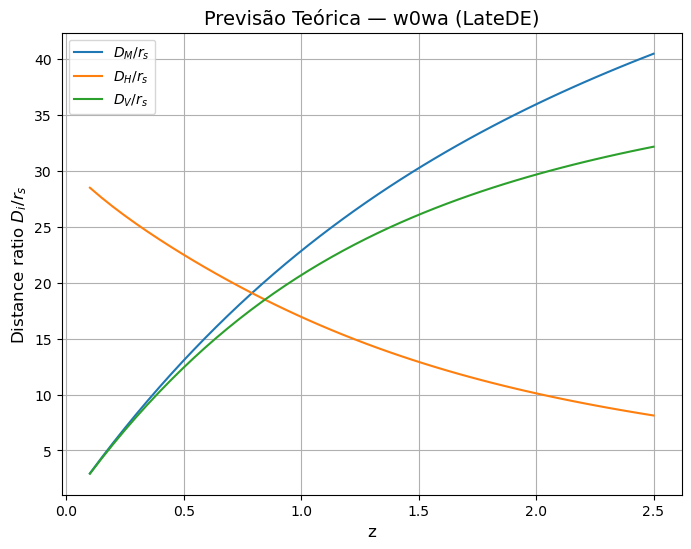

In [12]:
plt.figure(figsize=(8,6))
plt.plot(z_w0wa, DM_w0wa, label=r'$D_M/r_s$', color='tab:blue')
plt.plot(z_w0wa, DH_w0wa, label=r'$D_H/r_s$', color='tab:orange')
plt.plot(z_w0wa, DV_w0wa, label=r'$D_V/r_s$', color='tab:green')

plt.xlabel('z', fontsize=12)
plt.ylabel(r'Distance ratio $D_i / r_s$', fontsize=12)
plt.title('Previsão Teórica — w0wa (LateDE)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import pandas as pd

desi_file = r'C:\Users\Paula\Downloads\desi_gaussian_bao_ALL_GCcomb_mean.txt'
desi = pd.read_csv(desi_file, sep=r'\s+', comment='#', names=['z', 'value', 'quantity'])

DM_desi = desi[desi['quantity'] == 'DM_over_rs']
DH_desi = desi[desi['quantity'] == 'DH_over_rs']
DV_desi = desi[desi['quantity'] == 'DV_over_rs']


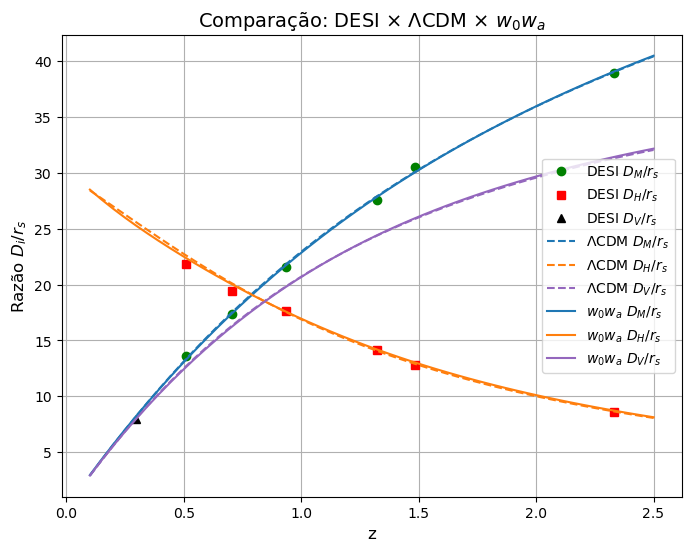

In [20]:
plt.figure(figsize=(8,6))

# --- Dados DESI ---
plt.plot(DM_desi['z'], DM_desi['value'], 'o', label='DESI $D_M/r_s$', color='green')
plt.plot(DH_desi['z'], DH_desi['value'], 's', label='DESI $D_H/r_s$', color='red')
plt.plot(DV_desi['z'], DV_desi['value'], '^', label='DESI $D_V/r_s$', color='black')

# --- Teoria: ΛCDM ---
plt.plot(z_LCDM, DM_LCDM, '--', color='tab:blue', label='ΛCDM $D_M/r_s$')
plt.plot(z_LCDM, DH_LCDM, '--', color='tab:orange', label='ΛCDM $D_H/r_s$')
plt.plot(z_LCDM, DV_LCDM, '--', color='tab:purple', label='ΛCDM $D_V/r_s$')

# --- Teoria: w0-wa ---
plt.plot(z_w0wa, DM_w0wa, '-', color='tab:blue', label='$w_0w_a$ $D_M/r_s$')
plt.plot(z_w0wa, DH_w0wa, '-', color='tab:orange', label='$w_0w_a$ $D_H/r_s$')
plt.plot(z_w0wa, DV_w0wa, '-', color='tab:purple', label='$w_0w_a$ $D_V/r_s$')

plt.xlabel('z', fontsize=12)
plt.ylabel(r'Razão $D_i / r_s$', fontsize=12)
plt.title('Comparação: DESI × ΛCDM × $w_0w_a$', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np

# DM(z) e DH(z): diferença máxima relativa
rel_max_DM = np.max(np.abs((DM_w0wa - DM_LCDM)/DM_LCDM))
rel_max_DH = np.max(np.abs((DH_w0wa - DH_LCDM)/DH_LCDM))

print("\nDM:  rel_max =", rel_max_DM)
print("\nDH:  rel_max =", rel_max_DH)



DM:  rel_max = 0.01229543650959057

DH:  rel_max = 0.012690343239970744


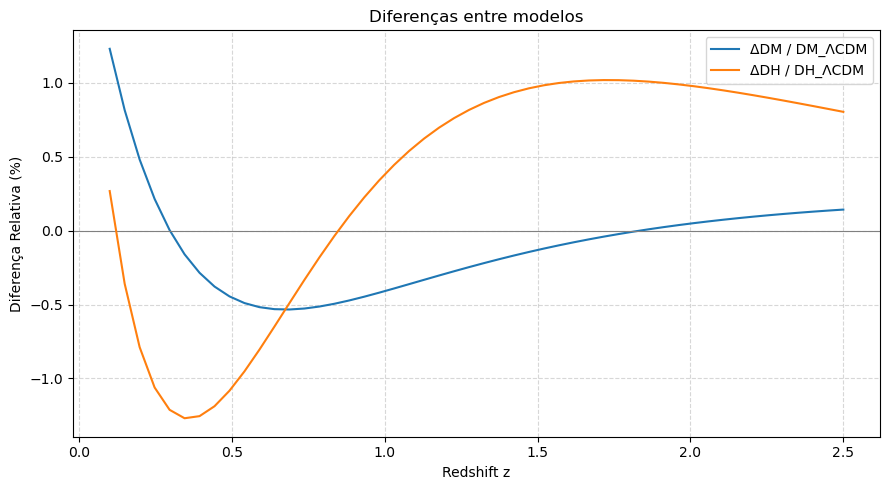

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
#    DIFERENÇAS ABSOLUTAS E RELATIVAS ENTRE OS MODELOS
# ==========================================================

# Diferença absoluta
dDM_abs = DM_w0wa - DM_LCDM
dDH_abs = DH_w0wa - DH_LCDM

# Diferença relativa (em %)
dDM_rel = (dDM_abs / DM_LCDM)*100
dDH_rel = (dDH_abs / DH_LCDM)*100

# ==========================================================
#                        GRÁFICO
# ==========================================================
plt.figure(figsize=(9,5))

plt.plot(z_LCDM, dDM_rel, label="ΔDM / DM_ΛCDM")
plt.axhline(0, color='gray', linewidth=0.8)

plt.plot(z_LCDM, dDH_rel, label="ΔDH / DH_ΛCDM")

plt.xlabel("Redshift z")
plt.ylabel("Diferença Relativa (%)")
plt.title("Diferenças entre modelos")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

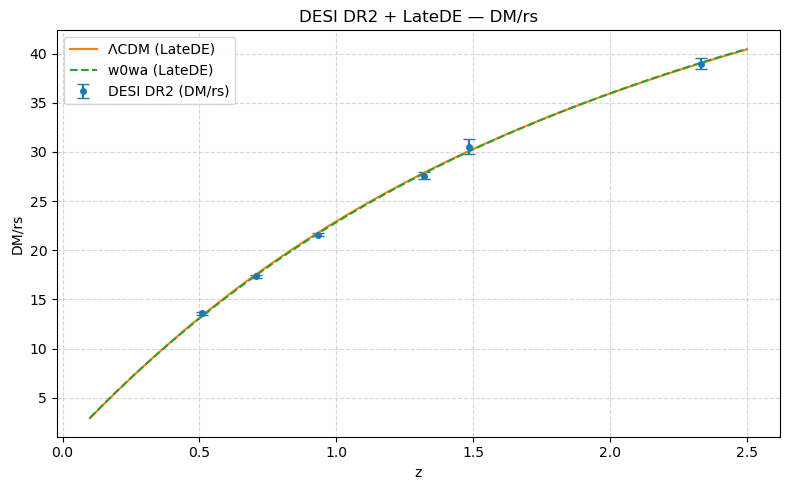

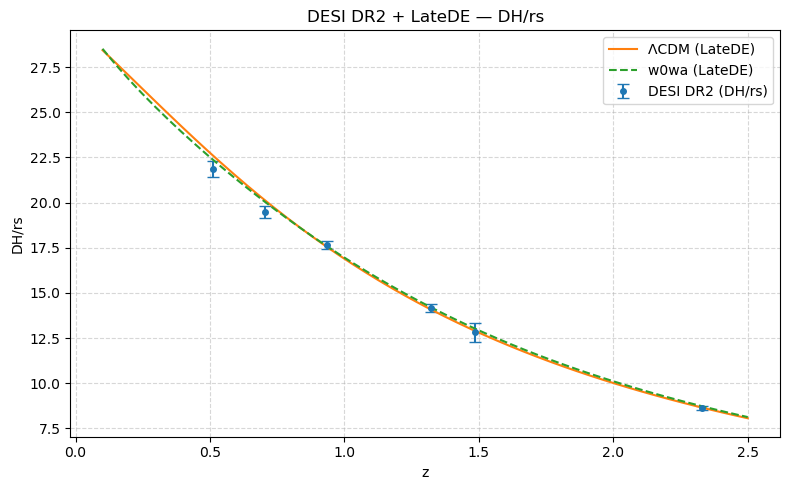

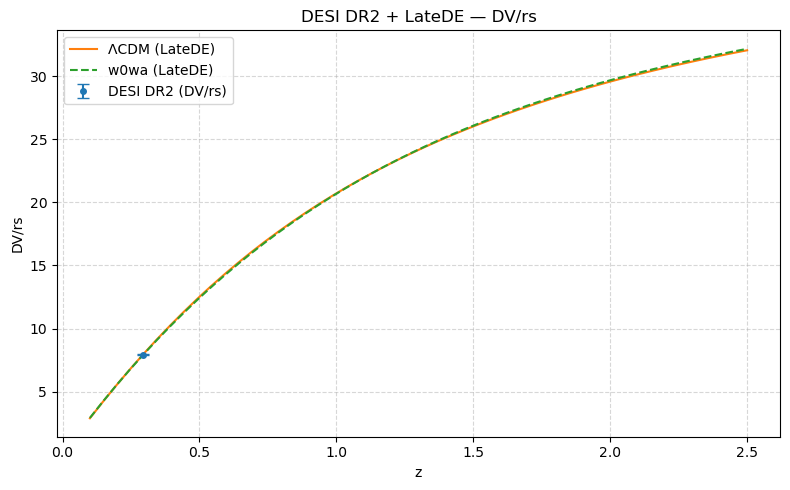

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Carregar os dados DESI DR2
# -------------------------------------------------------

mean_file = r"C:\Users\Paula\Downloads\desi_gaussian_bao_ALL_GCcomb_mean.txt"
cov_file  = r"C:\Users\Paula\Downloads\desi_gaussian_bao_ALL_GCcomb_cov.txt"

# Matriz de covariância (13×13)
cov = np.loadtxt(cov_file)
errors = np.sqrt(np.diag(cov))   # barras de erro

# Ler arquivo mean
data = []
with open(mean_file, "r") as f:
    for line in f:
        if not line.startswith("#"):
            z, value, quantity = line.split()
            data.append([float(z), float(value), quantity])

data = np.array(data, dtype=object)

# -------------------------------------------------------
# 2. Separar Di/rs 
# -------------------------------------------------------
z_DM  = data[data[:,2]=="DM_over_rs"][:,0].astype(float)
DM    = data[data[:,2]=="DM_over_rs"][:,1].astype(float)
err_DM = errors[data[:,2]=="DM_over_rs"]

z_DH  = data[data[:,2]=="DH_over_rs"][:,0].astype(float)
DH    = data[data[:,2]=="DH_over_rs"][:,1].astype(float)
err_DH = errors[data[:,2]=="DH_over_rs"]

z_DV  = data[data[:,2]=="DV_over_rs"][:,0].astype(float)
DV    = data[data[:,2]=="DV_over_rs"][:,1].astype(float)
err_DV = errors[data[:,2]=="DV_over_rs"]

# -------------------------------------------------------
# 3. Gráfico DM/rs × z com previsões teóricas
# -------------------------------------------------------
plt.figure(figsize=(8,5))
plt.errorbar(z_DM, DM, yerr=err_DM, fmt='o', markersize=4, capsize=4, label="DESI DR2 (DM/rs)")
plt.plot(z_LCDM, DM_LCDM, '-', label="ΛCDM (LateDE)")
plt.plot(z_LCDM, DM_w0wa, '--', label="w0wa (LateDE)")

plt.xlabel("z")
plt.ylabel("DM/rs")
plt.title("DESI DR2 + LateDE — DM/rs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 4. Gráfico DH/rs × z com previsões teóricas
# -------------------------------------------------------
plt.figure(figsize=(8,5))
plt.errorbar(z_DH, DH, yerr=err_DH, fmt='o', markersize=4, capsize=4, label="DESI DR2 (DH/rs)")
plt.plot(z_LCDM, DH_LCDM, '-', label="ΛCDM (LateDE)")
plt.plot(z_LCDM, DH_w0wa, '--', label="w0wa (LateDE)")

plt.xlabel("z")
plt.ylabel("DH/rs")
plt.title("DESI DR2 + LateDE — DH/rs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 5. Gráfico DV/rs × z com previsões teóricas
# -------------------------------------------------------
plt.figure(figsize=(8,5))
plt.errorbar(z_DV, DV, yerr=err_DV, fmt='o', markersize=4, capsize=4, label="DESI DR2 (DV/rs)")
plt.plot(z_LCDM, DV_LCDM, '-', label="ΛCDM (LateDE)")
plt.plot(z_LCDM, DV_w0wa, '--', label="w0wa (LateDE)")

plt.xlabel("z")
plt.ylabel("DV/rs")
plt.title("DESI DR2 + LateDE — DV/rs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
